In [2]:
clear all

In [3]:
# Universal Constants
g = 9.81

from math import *
from math import pi
import math as math
import pickle
import numpy as np
import pandas as pd
from devtools.convert import influx_to_dataframe
from pathlib import Path
import pytz
from datetime import datetime
import numbers

import time

from scipy.optimize import curve_fit

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import axpac.cpl as cpl
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = 8, 6
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from CoolProp.CoolProp import PropsSI

import warnings

#Set up variables
rb_thermal_offset1 = 0
rb_thermal_offset2 = 0
crs_baseline1 = 0
crs_baseline2 = 0
day1_off = 0
day1_crs = 0
day1_time = 0

day2_off = 0
day2_crs = 0
day2_time = 0

day3_off = 0
day3_crs = 0
day3_time = 0

day4_off = 0
day4_crs = 0
day4_time = 0

day5_off = 0
day5_crs = 0
day5_time = 0

day6_off = 0
day6_crs = 0
day6_time = 0

day7_off = 0
day7_crs = 0
day7_time = 0

day8_off = 0
day8_crs = 0
day8_time = 0

day9_off = 0
day9_crs = 0
day9_time = 0

day10_off = 0
day10_crs = 0
day10_time = 0

CMP4 = 19.4 #kW e
CMP3 = 26.4 #kW e

In [4]:
### Load Data
import numpy
import csv
import pandas
import pytz
from devtools import convert
with open('building_load_data3.pickle', 'rb') as fh:
    load = pickle.load(fh)
    load_df = influx_to_dataframe(load)
    #load_df = load_df.dropna()

In [5]:
#manually finding start and end times of failures
print(load_df['crs.baseline.power.kW'].index[13812])
print(load_df['crs.baseline.power.kW'].index[23500])
print(load_df['crs.baseline.power.kW'].index[27334])
print(load_df['crs.baseline.power.kW'].index[27862])
print(load_df['crs.baseline.power.kW'].index[28591])
print(load_df['crs.baseline.power.kW'].index[29316])

2019-06-12 22:00:00+00:00
2019-06-19 15:39:00+00:00
2019-06-22 08:28:00+00:00
2019-06-22 17:16:00+00:00
2019-06-23 05:25:00+00:00
2019-06-23 17:30:00+00:00


In [6]:
#manually finding start and end times of days
print(load_df['crs.baseline.power.kW'].index[14172])
print(load_df['crs.baseline.power.kW'].index[15612])
print(load_df['crs.baseline.power.kW'].index[17042])
print(load_df['crs.baseline.power.kW'].index[18482])
print(load_df['crs.baseline.power.kW'].index[19922])
print(load_df['crs.baseline.power.kW'].index[21362])
print(load_df['crs.baseline.power.kW'].index[22801])
print(load_df['crs.baseline.power.kW'].index[24241])
print(load_df['crs.baseline.power.kW'].index[28506])

2019-06-13 04:00:00+00:00
2019-06-14 04:00:00+00:00
2019-06-15 04:00:00+00:00
2019-06-16 04:00:00+00:00
2019-06-17 04:00:00+00:00
2019-06-18 04:00:00+00:00
2019-06-19 04:00:00+00:00
2019-06-20 04:00:00+00:00
2019-06-23 04:00:00+00:00


In [7]:
def is_number(s):
    try:
        if str(s).lower() != "nan":
            float(s)
            return True
    except ValueError:
        pass
    return False

In [8]:
pd.set_option('display.max_columns', None)
load_df

,building.actual.power.W,building.actual.power.kW,building.baseline.power.W,building.baseline.power.kW,building.offset.W,building.offset.kW,building.thermal_load.W,building.thermal_load.kW,crs.actual.power.W,crs.actual.power.kW,crs.baseline.cop,crs.baseline.power.W,crs.baseline.power.kW,crs.baseline.thermal_load.W,crs.baseline.thermal_load.kW,crs.offset.power.W,crs.offset.power.kW,crs.offset.rackA.power.W,crs.offset.rackA.power.kW,crs.offset.rackB.power.W,crs.offset.rackB.power.kW,crs.power_absolute_error.W,crs.power_absolute_error.kW,crs.power_percent_error,rb.cop.instant.charge,rb.cop.instant.discharge,rb.parasitics.electrical.W,rb.parasitics.electrical.kW,rb.performance_ratio.instant.charge,rb.performance_ratio.instant.discharge,rb.state_of_charge.J,rb.state_of_charge.fraction,rb.state_of_charge.kJ,rb.state_of_charge.percent,rb.thermal_load.W,rb.thermal_load.kW,rbCur,rbCur_num,site_id
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-03 07:01:00+00:00,205321.333333,205.321333,167817.077121,167.817077,37504.256212,37.504256,263230.665270,263.230665,75767.333333,75.767333,4.138261,50480.690199,50.480690,208431.786031,208.431786,24507.589546,24.507590,-779.053589,-0.779054,25286.643134,25.286643,NaN,NaN,NaN,1.078194,0.0,12996.666667,12.996667,1.078194,0.0,3.947019e+09,0.788206,3.947019e+06,78.820581,55116.003621,55.116004,CHG,1.0,wmec
2019-06-03 07:02:00+00:00,205525.000000,205.525000,165228.083759,165.228084,40296.916241,40.296916,259879.128308,259.879128,75442.666667,75.442667,4.140383,48390.931787,48.390932,199905.709021,199.905709,26663.582907,26.663583,-388.151973,-0.388152,27051.734880,27.051735,NaN,NaN,NaN,1.023018,0.0,13633.333333,13.633333,1.023018,0.0,3.949414e+09,0.788684,3.949414e+06,78.868394,60381.997340,60.381997,CHG,1.0,wmec
2019-06-03 07:03:00+00:00,204124.821429,204.124821,159962.609805,159.962610,44162.211624,44.162212,261548.534570,261.548535,75537.232143,75.537232,4.141313,46535.571461,46.535571,192284.302821,192.284303,28604.122349,28.604122,-397.538333,-0.397538,29001.660682,29.001661,NaN,NaN,NaN,1.037905,0.0,15558.089275,15.558089,1.037905,0.0,3.952085e+09,0.789217,3.952085e+06,78.921732,69749.004312,69.749004,CHG,1.0,wmec
2019-06-03 07:04:00+00:00,190742.333333,190.742333,145597.517890,145.597518,45144.815444,45.144815,263986.319088,263.986319,75651.666667,75.651667,4.141786,46428.110721,46.428111,191862.312487,191.862312,28761.482110,28.761482,-462.073836,-0.462074,29223.555946,29.223556,NaN,NaN,NaN,1.125605,0.0,16383.333333,16.383333,1.125605,0.0,3.955054e+09,0.789810,3.955054e+06,78.981038,72612.370208,72.612370,CHG,1.0,wmec
2019-06-03 07:05:00+00:00,193922.000000,193.922000,151208.978649,151.208979,42713.021351,42.713021,279326.691447,279.326691,76741.666667,76.741667,4.139353,49949.789736,49.949790,206294.256915,206.294257,26003.021351,26.003021,-788.855580,-0.788856,26791.876931,26.791877,NaN,NaN,NaN,1.292159,0.0,16710.000000,16.710000,1.292159,0.0,3.958287e+09,0.790456,3.958287e+06,79.045587,73351.197332,73.351197,CHG,1.0,wmec
2019-06-03 07:06:00+00:00,197943.666667,197.943667,155328.285398,155.328285,42615.381268,42.615381,281794.830761,281.794831,77309.000000,77.309000,4.138729,50465.003713,50.465004,208390.664673,208.390665,25818.714602,25.818715,-1025.281685,-1.025282,26843.996287,26.843996,NaN,NaN,NaN,1.334234,0.0,16796.666667,16.796667,1.334234,0.0,3.961619e+09,0.791121,3.961619e+06,79.112134,73686.500128,73.686500,CHG,1.0,wmec
2019-06-03 07:07:00+00:00,198924.000000,198.924000,155479.963380,155.479963,43444.036620,43.444037,276158.985248,276.158985,76849.333333,76.849333,4.140169,49171.370256,49.171370,203119.372348,203.119372,26787.369953,26.787370,-890.593124,-0.890593,27677.963077,27.677963,NaN,NaN,NaN,1.325653,0.0,16656.666667,16.656667,1.325653,0.0,3.964996e+09,0.791796,3.964996e+06,79.179558,73385.851268,73.385851,CHG,1.0,wmec
2019-06-03 07:08:00+00:00,202575.892857,202.575893,160087.373760,160.087374,42488.519097,42.488519,284127.328923,284.127329,77470.535714,77.470536,4.137843,

## Calculate DCHG Down Time Per Event [Analysis-68]

## Sum up thermal offset and baseline power totals

In [9]:
### Sum up DCHG Values for RB Offset and CRS Baseline
#need to adjust for perfest re-run
for i in range(13812,23500): #event 1
    if load_df['rbCur_num'].values[i] == -1:
        if is_number(load_df['crs.baseline.power.kW'].values[i]):
            if abs(load_df['crs.offset.rackB.power.kW'].values[i]) > CMP4:
                rackB_offset = -CMP4
            else:
                rackB_offset = load_df['crs.offset.rackB.power.kW'].values[i]
                
                
            if i < 14172 and rackB_offset < 0:
                day1_off = day1_off+rackB_offset
                day1_crs = day1_crs+load_df['crs.baseline.power.kW'].values[i]
                day1_time = day1_time+1.0#mins
            elif i < 15612 and rackB_offset < 0:
                day2_off = day2_off+rackB_offset
                day2_crs = day2_crs+load_df['crs.baseline.power.kW'].values[i]
                day2_time = day2_time+1.0#mins
            elif i < 17042 and rackB_offset < 0:
                day3_off = day3_off+rackB_offset
                day3_crs = day3_crs+load_df['crs.baseline.power.kW'].values[i]
                day3_time = day3_time+1#mins
            elif i < 18482 and rackB_offset < 0:
                day4_off = day4_off+rackB_offset
                day4_crs = day4_crs+load_df['crs.baseline.power.kW'].values[i]
                day4_time = day4_time+1#mins
            elif i < 19922 and rackB_offset < 0:
                day5_off = day5_off+rackB_offset
                day5_crs = day5_crs+load_df['crs.baseline.power.kW'].values[i]
                day5_time = day5_time+1#mins
            elif i < 21362 and rackB_offset < 0:
                day6_off = day6_off+rackB_offset
                day6_crs = day6_crs+load_df['crs.baseline.power.kW'].values[i]
                day6_time = day6_time+1#mins
            elif i < 22801 and rackB_offset < 0:
                day7_off = day7_off+rackB_offset
                day7_crs = day7_crs+load_df['crs.baseline.power.kW'].values[i]
                day7_time = day7_time+1#mins
            elif i < 24241 and rackB_offset < 0:
                day8_off = day8_off+rackB_offset
                day8_crs = day8_crs+load_df['crs.baseline.power.kW'].values[i]
                day8_time = day8_time+1#mins
for j in range(27334,29316):#event 2
    if load_df['rbCur_num'].values[j] == -1:
        if abs(load_df['crs.offset.rackB.power.kW'].values[j]) > CMP3:
            rackB_offset = -CMP3
        else:
            rackB_offset = load_df['crs.offset.rackB.power.kW'].values[j]
        if is_number(load_df['crs.baseline.power.kW'].values[j]) and j < 28506:
            rackB_offset = load_df['crs.offset.rackB.power.kW'].values[j]
            if j>27862 and j<28591:#subtracting out effect of CMP4
                if is_number(load_df['crs.baseline.power.kW'].values[j]):
                    if (rackB_offset+CMP4) < 0:
                        if abs(rackB_offset+CMP4) > CMP3:
                            rackB_offset = -CMP3
                        else:
                            rackB_offset = rackB_offset+CMP4
                        day9_off = day9_off+rackB_offset
                        day9_crs = day9_crs+load_df['crs.baseline.power.kW'].values[j]
                        day9_time = day9_time+1#mins

            else:
                if abs(load_df['crs.offset.rackB.power.kW'].values[j]) > CMP3:
                    rackB_offset = -CMP3
                else:
                    rackB_offset = load_df['crs.offset.rackB.power.kW'].values[j]
                if (rackB_offset) < 0:
                    day9_off = day9_off+rackB_offset
                    day9_crs = day9_crs+load_df['crs.baseline.power.kW'].values[j]
                    day9_time = day9_time+1#mins
        else:
            if abs(load_df['crs.offset.rackB.power.kW'].values[j]) > CMP3:
                rackB_offset = -CMP3
            else:
                rackB_offset = load_df['crs.offset.rackB.power.kW'].values[j]
            if is_number(load_df['crs.offset.rackB.power.kW'].values[j]):
                if rackB_offset < 0:
                    day10_off = day10_off+rackB_offset
                    day10_crs = day10_crs+load_df['crs.baseline.power.kW'].values[j]
                    day10_time = day10_time+1 #mins
                

In [10]:
day1_hours = day1_time/60
day2_hours = day2_time/60
day3_hours = day3_time/60
day4_hours = day4_time/60
day5_hours = day5_time/60
day6_hours = day6_time/60
day7_hours = day7_time/60
day8_hours = day8_time/60
day9_hours = day9_time/60
day10_hours = day10_time/60

In [11]:
###If there are not enough hours of backup cooling to result in savings, set all variables to ensure 0 calculation (and avoid dividing by 0)
if day1_hours <= 0:
    day1_hours_eff = 1
    day1_off = 0
    day1_crs = 1
    print(1)
if day2_hours <= 0:
    day2_hours_eff = 1
    day2_off = 0
    day2_crs = 1
    print(2)
if day3_hours <= 0:
    day3_hours_eff = 1
    day3_off = 0
    day3_crs = 1
    print(3)
if day4_hours <= 0:
    day4_hours = 1
    day4_off = 0
    day4_crs = 1
    print(4)
if day5_hours <= 0:
    day5_hours_eff = 1
    day5_off = 0
    day5_crs = 1
    print(5)
if day6_hours <= 0:
    day6_hours_eff = 1
    day6_off = 0
    day6_crs = 1
    print(6)
if day7_hours <= 0:
    day7_hours_eff = 1
    day7_off = 0
    day7_crs = 1
    print(7)
if day8_hours <= 0:
    day8_hours_eff = 1
    day8_off = 0
    day8_crs = 1
    print(8)
if day9_hours <= 0:
    day9_hours_eff = 1
    day9_off = 0
    day9_crs = 1
    print(9)
if day10_hours <= 0:
    day10_hours_eff = 1
    day10_off = 0
    day10_crs = 1
    print(10)


5


In [12]:

day1_percent = abs(day1_off)/day1_crs
day2_percent = abs(day2_off)/day2_crs
day3_percent = abs(day3_off)/day3_crs
day4_percent = abs(day4_off)/day4_crs
day5_percent = abs(day5_off)/day5_crs
day6_percent = abs(day6_off)/day6_crs
day7_percent = abs(day7_off)/day7_crs
day8_percent = abs(day8_off)/day8_crs
day9_percent = abs(day9_off)/day9_crs
day10_percent = abs(day10_off)/day10_crs

In [13]:

day1_savings = max((day1_hours*day1_percent-2)*5000,0)
day2_savings = max((day2_hours*day2_percent-2)*5000,0)
day3_savings = max((day3_hours*day3_percent-2)*5000,0)
day4_savings = max((day4_hours*day4_percent-2)*5000,0)
day5_savings = max((day5_hours*day5_percent-2)*5000,0)
day6_savings = max((day6_hours*day6_percent-2)*5000,0)
day7_savings = max((day7_hours*day7_percent-2)*5000,0)
day8_savings = max((day8_hours*day8_percent-2)*5000,0)
day9_savings = max((day9_hours*day9_percent-2)*5000,0)
day10_savings = max((day10_hours*day10_percent-2)*5000,0)

In [14]:

print('Day 1 Savings:', day1_savings)
print('Day 2 Savings:', day2_savings)
print('Day 3 Savings:', day3_savings)
print('Day 4 Savings:', day4_savings)
print('Day 5 Savings:', day5_savings)
print('Day 6 Savings:', day6_savings)
print('Day 7 Savings:', day7_savings)
print('Day 8 Savings:', day8_savings)
print('Day 9 Savings:', day9_savings)
print('Day 10 Savings:', day10_savings)
print('Total Savings:', day1_savings+day2_savings+day3_savings+day4_savings+day5_savings+day6_savings+day7_savings+day9_savings+day10_savings)

Day 1 Savings: 0
Day 2 Savings: 0
Day 3 Savings: 0
Day 4 Savings: 0
Day 5 Savings: 0
Day 6 Savings: 0
Day 7 Savings: 0
Day 8 Savings: 0
Day 9 Savings: 0
Day 10 Savings: 0
Total Savings: 0


In [15]:
print('Day 1 Time:', day1_hours)
print('Day 2 Time:', day2_hours)
print('Day 3 Time:', day3_hours)
print('Day 4 Time:', day4_hours)
print('Day 5 Time:', day5_hours)
print('Day 6 Time:', day6_hours)
print('Day 7 Time:', day7_hours)
print('Day 8 Time:', day8_hours)
print('Day 9 Time:', day9_hours)
print('Day 10 Time:', day10_hours)


Day 1 Time: 2.533333333333333
Day 2 Time: 0.38333333333333336
Day 3 Time: 0.11666666666666667
Day 4 Time: 0.3
Day 5 Time: 0.0
Day 6 Time: 0.03333333333333333
Day 7 Time: 0.016666666666666666
Day 8 Time: 0.016666666666666666
Day 9 Time: 5.75
Day 10 Time: 1.4333333333333333


In [16]:
print('Day 1 Percent:', day1_percent)
print('Day 2 Percent:', day2_percent)
print('Day 3 Percent:', day3_percent)
print('Day 4 Percent:', day4_percent)
print('Day 5 Percent:', day5_percent)
print('Day 6 Percent:', day6_percent)
print('Day 7 Percent:', day7_percent)
print('Day 8 Percent:', day8_percent)
print('Day 9 Percent:', day9_percent)
print('Day 10 Percent:', day10_percent)

Day 1 Percent: 0.2593599427644023
Day 2 Percent: 0.2092119781573106
Day 3 Percent: 0.19409199162654578
Day 4 Percent: 0.2117709518570942
Day 5 Percent: 0.0
Day 6 Percent: 0.23943205373166662
Day 7 Percent: 0.09927509438064368
Day 8 Percent: 0.5227668808732068
Day 9 Percent: 0.15550415112298996
Day 10 Percent: 0.1318793376443097


In [17]:
print('Day 1 Offset:', day1_off/60)
print('Day 2 Offset:', day2_off/60)
print('Day 3 Offset:', day3_off/60)
print('Day 4 Offset:', day4_off/60)
print('Day 5 Offset:', day5_off/60)
print('Day 6 Offset:', day6_off/60)
print('Day 7 Offset:', day7_off/60)
print('Day 8 Offset:', day8_off/60)
print('Day 9 Offset:', day9_off/60)
print('Day 10 Offset:', day10_off/60)
print('Total Savings:', day1_savings+day2_savings+day3_savings+day4_savings+day5_savings+day6_savings+day7_savings+day9_savings+day10_savings)

Day 1 Offset: -45.415867498419445
Day 2 Offset: -5.802918876868916
Day 3 Offset: -1.3243347622087962
Day 4 Offset: -4.917614017053362
Day 5 Offset: 0.0
Day 6 Offset: -0.4209444795631768
Day 7 Offset: -0.051334127043253894
Day 8 Offset: -0.22179658555278287
Day 9 Offset: -47.90346399713666
Day 10 Offset: -9.615096367420973
Total Savings: 0


In [18]:
#rb heat transfer during failure 1
#plt.plot(load_df['rb.thermal_load.kW'].values[1514:11192])

In [19]:
#rb heat transfer during period 2
#plt.plot(load_df['rb.thermal_load.kW'].values[15026:17008])

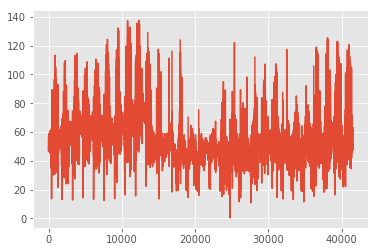

In [20]:
#crs baseline over June Period
plt.plot(load_df['crs.baseline.power.kW'].values)

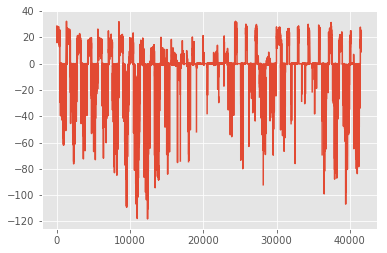

In [21]:
plt.plot(load_df['crs.offset.rackB.power.kW'].values+load_df['crs.offset.rackA.power.kW'].values)